In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt


# Classification 

In [162]:
# Load digits dataset
digits = datasets.load_digits()

In [163]:
#create label and data array
x = digits.data

y = digits.target

# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## k-Nearest Neigbours

In [164]:
# initiate lists
train_score = []
test_score = []

# Loop to append kNN scores from 1-8
for i in range(1,9):
    
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(x_train, y_train)
    train_score.append(kNN.score(x_train, y_train))
    test_score.append(kNN.score(x_test, y_test))                   
print(train_score)
print(test_score)


[1.0, 0.9874739039665971, 0.9923451635351427, 0.9895615866388309, 0.9909533750869868, 0.9874739039665971, 0.988865692414753, 0.9874739039665971]
[0.9888888888888889, 0.9916666666666667, 0.9916666666666667, 0.9888888888888889, 0.9888888888888889, 0.9861111111111112, 0.9861111111111112, 0.9833333333333333]


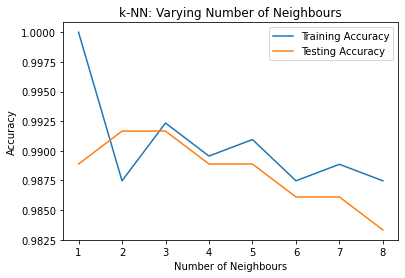

In [165]:
# Plot kNN test and train set accuracies
plt.plot(range(1,9), train_score, label = 'Training Accuracy' )
plt.plot(range(1,9), test_score, label = 'Testing Accuracy' )
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.title('k-NN: Varying Number of Neighbours')
plt.legend()

## Support Vector Machine

In [166]:
# linear SVM
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.93      0.97      0.95        39
           2       1.00      1.00      1.00        31
           3       0.93      1.00      0.96        26
           4       1.00      1.00      1.00        46
           5       1.00      0.94      0.97        34
           6       1.00      0.95      0.97        41
           7       1.00      1.00      1.00        39
           8       0.94      0.86      0.90        35
           9       0.90      0.97      0.93        29

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [167]:
# Poly SVM
svc2 = SVC(kernel='poly')
svc2.fit(x_train, y_train)
y_pred = svc2.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        46
           5       1.00      0.97      0.99        34
           6       1.00      0.98      0.99        41
           7       1.00      1.00      1.00        39
           8       1.00      1.00      1.00        35
           9       0.97      1.00      0.98        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [168]:
# Sigmoid SVM
svc3 = SVC(kernel='sigmoid')
svc3.fit(x_train, y_train)
y_pred = svc3.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.82      0.82      0.82        39
           2       0.97      0.94      0.95        31
           3       0.96      0.96      0.96        26
           4       0.94      0.98      0.96        46
           5       1.00      0.91      0.95        34
           6       0.97      0.95      0.96        41
           7       0.86      0.97      0.92        39
           8       0.93      0.74      0.83        35
           9       0.85      0.97      0.90        29

    accuracy                           0.93       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.93      0.93      0.92       360



In [10]:
# I would select the poly kernel. It has shown the highest precision and accuracy values

## Naive Bayes

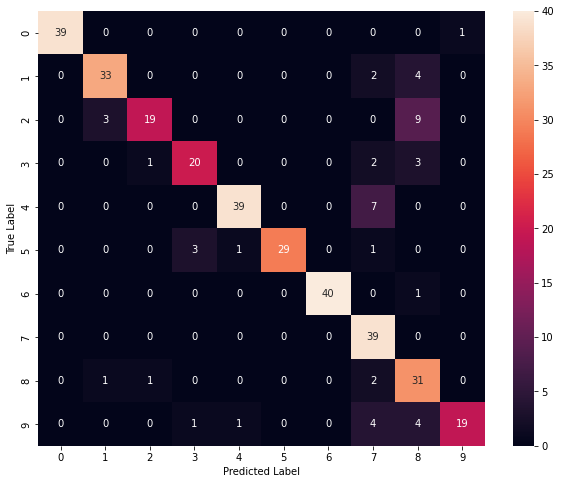

In [169]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(x_train, y_train)

bayes.score(x_test, y_test)
y_pred = bayes.predict(x_test)
conf_matrix =confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot = True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

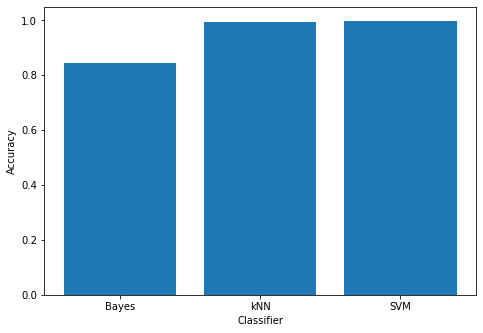

In [119]:
# kNN classifier score

# Bar plot for classifiers
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Plot Bayes, svm kNN
data = {'Bayes':bayes.score(x_test, y_test), 'kNN':kNN.score(x_test, y_test), 'SVM':svc2.score(x_train, y_train)}
test_type = list(data.keys())
test_score = list(data.values())

ax.bar(test_type,test_score)
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.show()




# Regression

## Linear Regression

In [66]:
df = pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


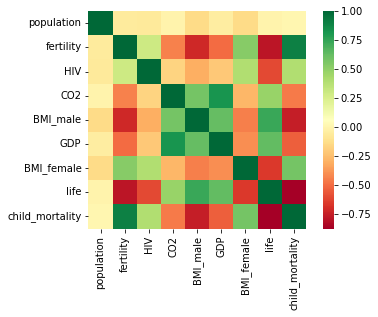

In [38]:
# # Plot heatmap
#plt.figure(figsize=(10,10))
heat_map = sns.heatmap(df.corr(), cmap='RdYlGn', square = True)

# # sets the labels at different angles
# heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=90, horizontalalignment='right')
# heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0, horizontalalignment='right')


0.6192442167740035


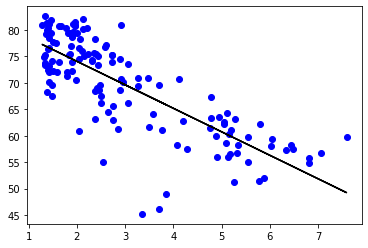

In [24]:
# Linear regression using fertility agains life
x = df[['fertility']]
y = df['life']

regression = LinearRegression()
regression.fit(x,y)
print(regression.score(x,y))

fig, ax = plt.plot(x,y, 'bo', x, regression.predict(x), '-k')

In [25]:
#Linear regression with all features against life
X = df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']]
y = df['life']

regression_all = LinearRegression()
regression_all.fit(X,y)


LinearRegression()

In [26]:
# 5-fold cross-validation for both regressions
print(cross_val_score(regression, x, y, cv = 5))
print(cross_val_score(regression_all, X, y))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


## Logistic Regression

In [67]:
# load creditcard
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


492 frauds,  284315 nonfrauds.


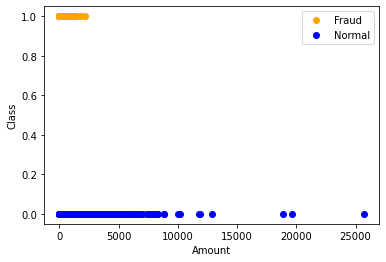

In [68]:
# plot graph with classes fraud and non-fraud
frauds = df.loc[df['Class'] ==1]
non_fraud = df.loc[df['Class'] ==0]
print(len(frauds), "frauds, ", len(non_fraud), "nonfrauds.")
plt.plot(frauds.Amount, frauds.Class, 'o', color= 'orange', label= 'Fraud')
plt.plot(non_fraud.Amount, non_fraud.Class, 'o', color= 'blue', label= 'Normal')
plt.ylabel('Class')
plt.xlabel('Amount')
plt.legend()

C:\Users\Ollie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

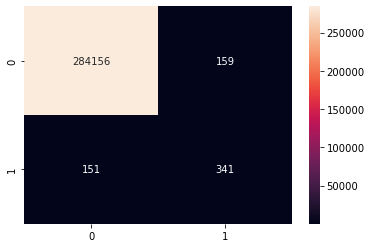

In [121]:
# Logistic regression
X = df.drop('Class', axis = 1)
y = df.Class

log_regression = LogisticRegression()
log_regression.fit(X,y)
y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt='g')